##Importing liabaries

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from numpy import unique

##Reading Dataset

In [33]:
# load the dataset
dataframe = pd.read_csv('creditcard.csv')
# get the values

In [34]:
# view first five rows
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Data prepration

In [35]:
#dropping irrevelent values and normalizing amount in range of [0,1]
dataframe['normAmount'] = StandardScaler().fit_transform(dataframe['Amount'].values.reshape (-1,1))
dataframe = dataframe.drop (['Amount'], axis = 1);
#divide dataset into x and y labels
x = dataframe.drop('Class', axis=1)
y = dataframe['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state = 69)
trainData = pd.concat([X_train, y_train], axis = 1)
testData = pd.concat([X_test, y_test], axis = 1)


#DATA EXPLORATION

##Data details




In [36]:
n_rows = x.shape[0]
n_cols = x.shape[1]
classes = unique(y)
n_classes = len(classes)
# summarize
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)
print('Class Breakdown:')
# class breakdown
breakdown = ''
for c in classes:
	total = len(y[y == c])
	ratio = (total / float(len(y))) * 100
	print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

N Examples: 284807
N Inputs: 30
N Classes: 2
Classes: [0 1]
Class Breakdown:
 - Class 0: 284315 (99.82725%)
 - Class 1: 492 (0.17275%)


In [37]:
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727,2.913952e-17
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


In [38]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        284807 non-null  float64
 1   V1          284807 non-null  float64
 2   V2          284807 non-null  float64
 3   V3          284807 non-null  float64
 4   V4          284807 non-null  float64
 5   V5          284807 non-null  float64
 6   V6          284807 non-null  float64
 7   V7          284807 non-null  float64
 8   V8          284807 non-null  float64
 9   V9          284807 non-null  float64
 10  V10         284807 non-null  float64
 11  V11         284807 non-null  float64
 12  V12         284807 non-null  float64
 13  V13         284807 non-null  float64
 14  V14         284807 non-null  float64
 15  V15         284807 non-null  float64
 16  V16         284807 non-null  float64
 17  V17         284807 non-null  float64
 18  V18         284807 non-null  float64
 19  V1

##SNS plot for classes disparity visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


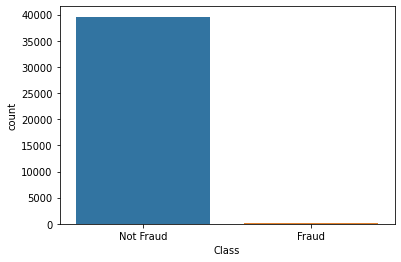

In [8]:
g = sns.countplot(dataframe['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

## Ploting Histogram

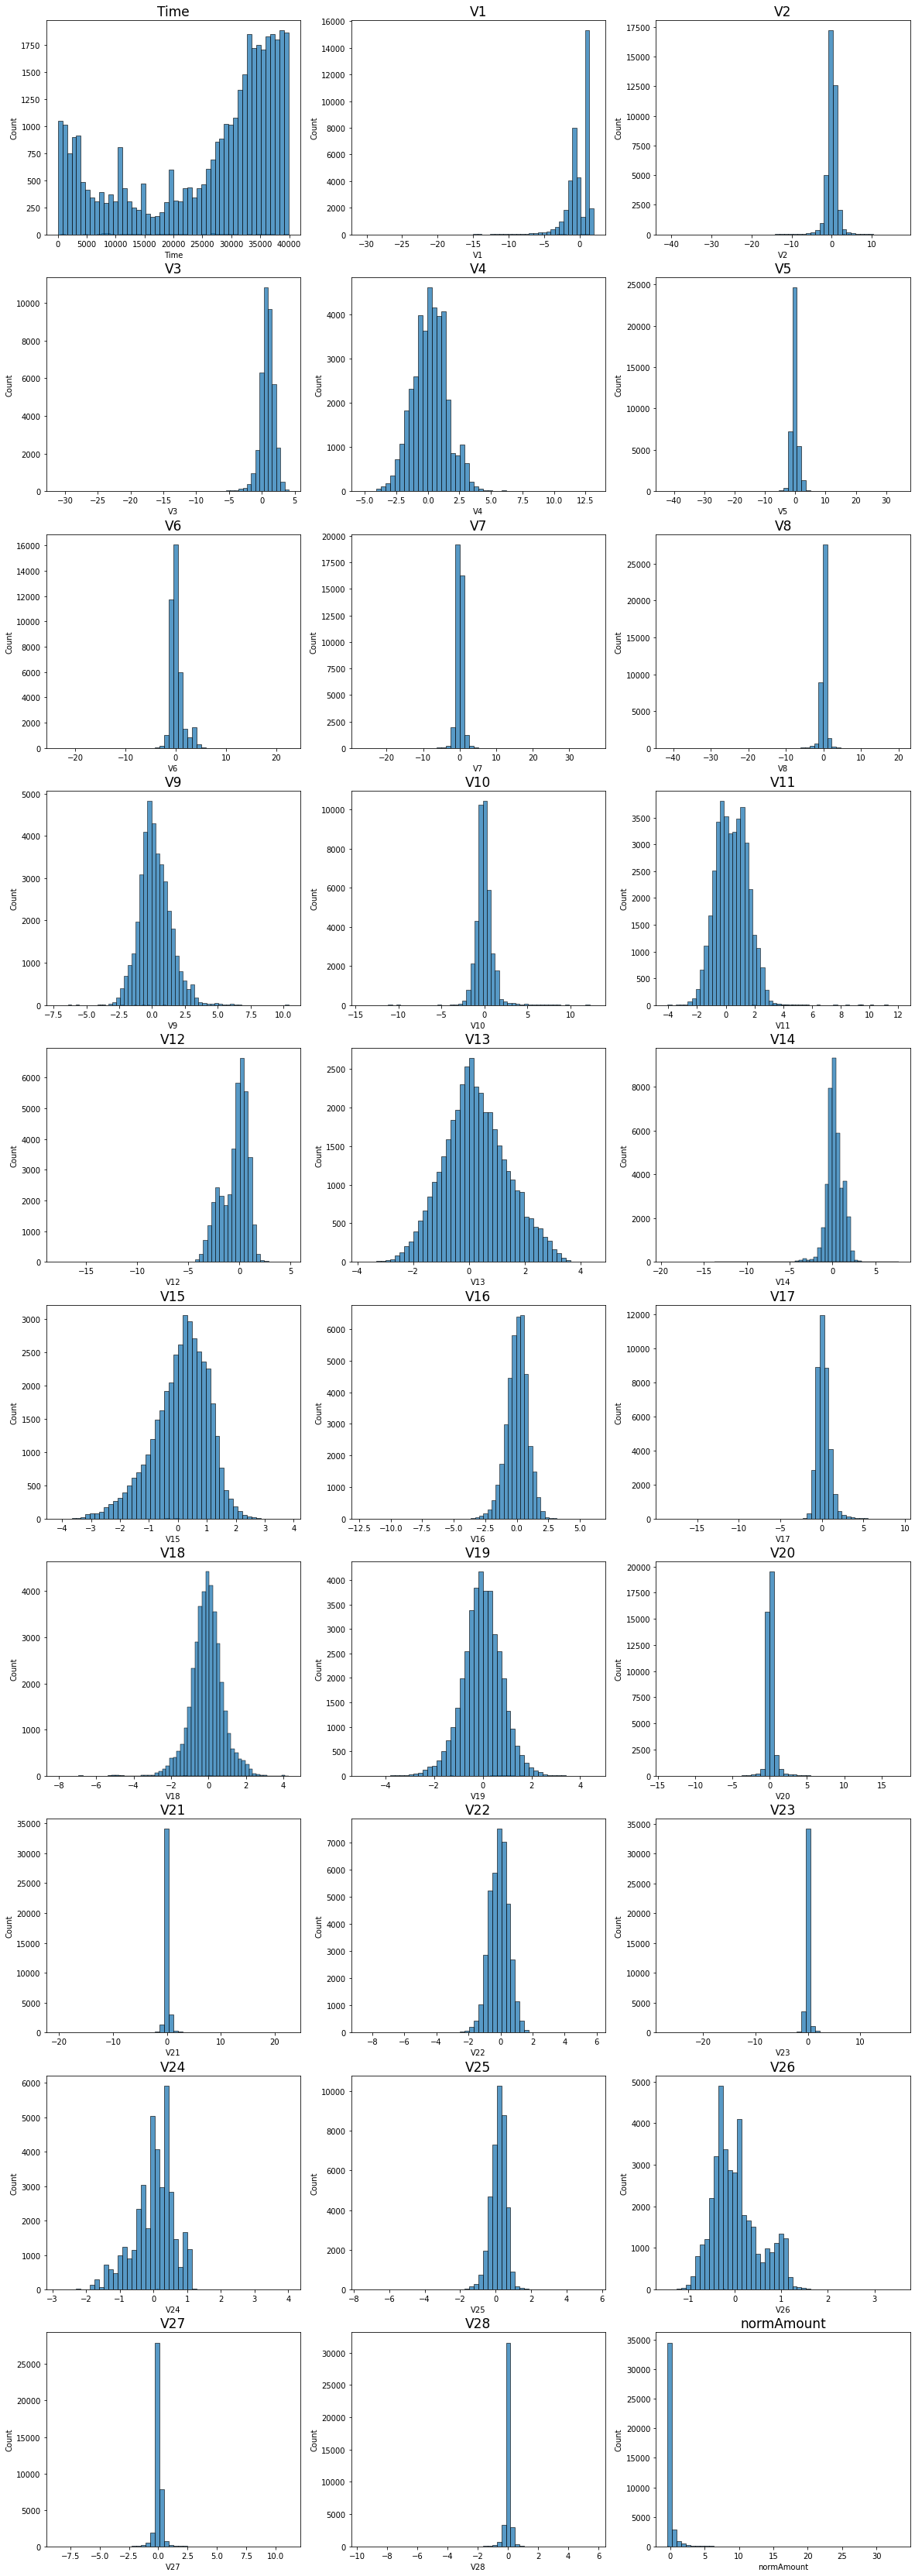

In [9]:
from pandas.io.formats.format import DataFrameFormatter
# plot the histogram of a variable from the dataset to see the skewness
normal_records = dataframe.Class == 0
fraud_records = dataframe.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(dataframe.drop('Class',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(dataframe[col][dataframe.Class == 1], bins=50)
    sns.histplot(dataframe[col][dataframe.Class == 0], bins=50)
    plt.title(col, fontsize=17)
plt.show()

##Ploting box plot

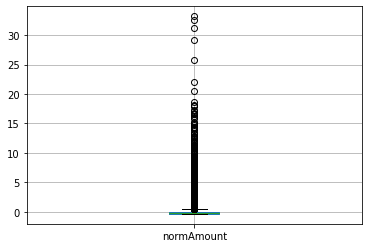

In [10]:
# ploting box plot to visualize outliers
dataframe.boxplot('normAmount')

## Plotting scatter plot

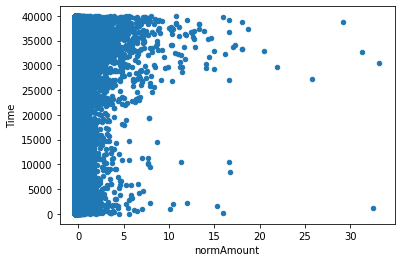

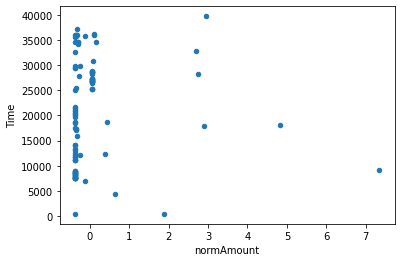

In [11]:
dataframe[dataframe.Class == 0].plot.scatter('normAmount','Time')
dataframe[dataframe.Class == 1].plot.scatter('normAmount','Time')

##Plotting pie chart

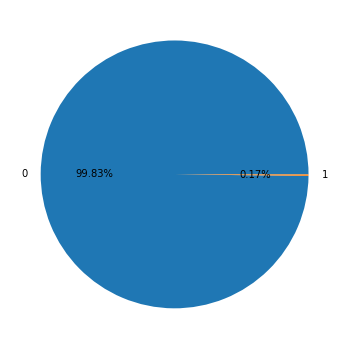

In [ ]:
# Pie chart shows clear disparity between two classes
plt.figure(figsize=(6, 8))
plt.pie(dataframe['Class'].value_counts().values, labels= dataframe['Class'].value_counts().index,autopct='%1.2f%%')
plt.show()


## Plotting correlation matrix

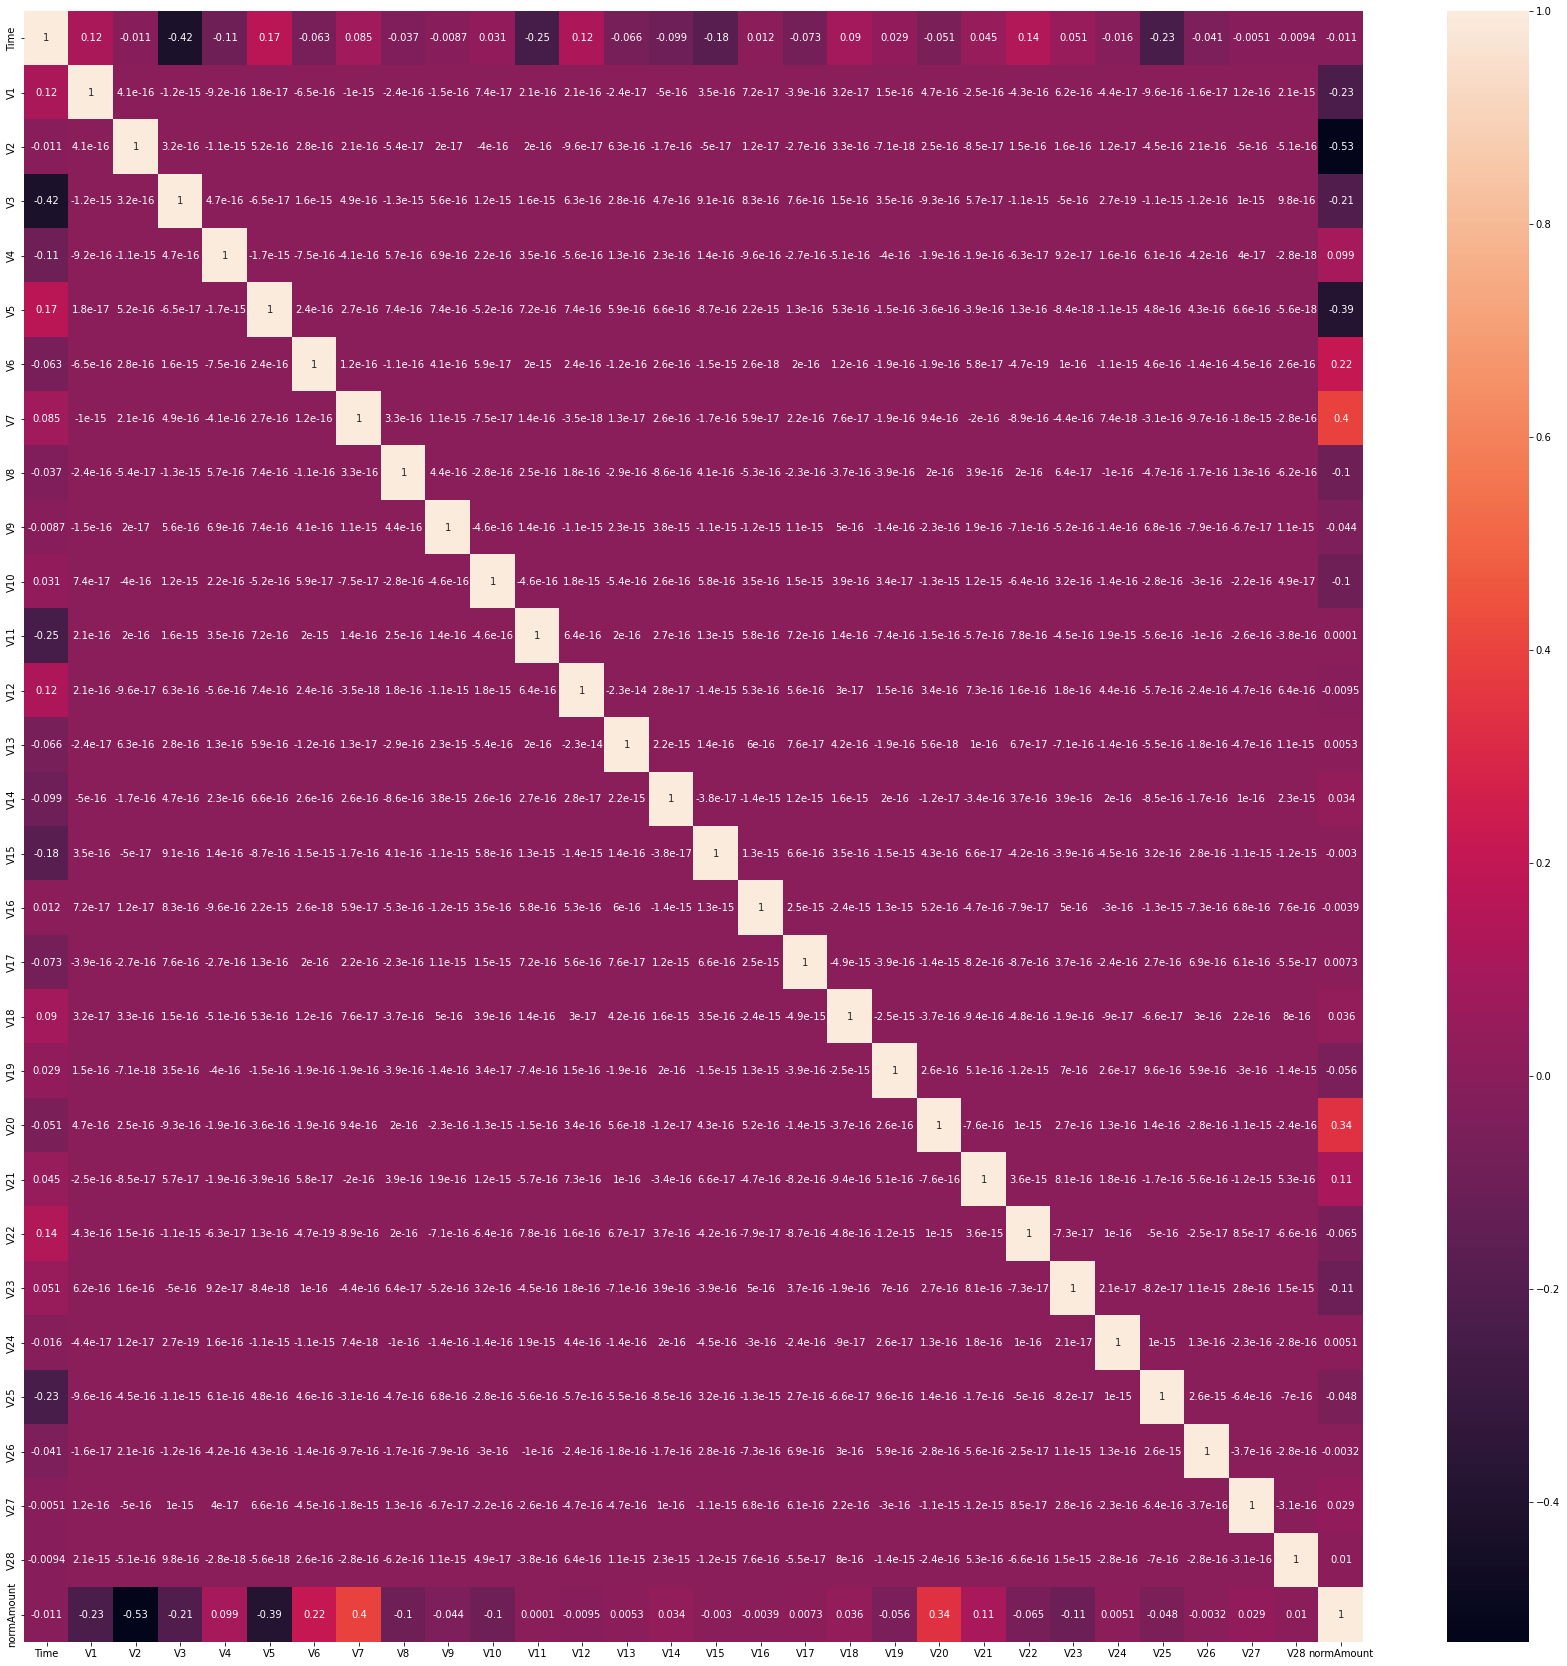

In [ ]:
# Corr matrix shows strength of relations between two different features
corr_matrix = x.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

#Defining classifiers

In [110]:
from sklearn import metrics
def classifiers(modelIter,dataset):
    values = dataset.values
    X = dataset.iloc[:, :len(dataset.columns)-1]
    y = dataset.iloc[:, -1]

    if (modelIter == 0):
      knn = KNeighborsClassifier(n_neighbors=2,weights='distance',metric='manhattan')
      knn.fit(X, y)
      return knn
    
    elif(modelIter == 1):
      dt = DecisionTreeClassifier(random_state=0, max_depth=3)
      dt.fit(X, y)
      return dt

    elif(modelIter==2):
      LR = LogisticRegression(penalty='l2', sample_weight=None).fit(X, y)
      return LR

# Code for inverse random under sampling (IRUS).

In [95]:
# Saving values of training data with majority classes in Xnmaj
XNmaj = trainData[(trainData["Class"] == 0) ]
# Saving values of training data with minority classes in Xnmaj
XNmin = trainData[(trainData["Class"] == 1)]
# len of  minority examples
Nmin = len(XNmin)
# len of majority examples
Nmaj = len(XNmaj)
print('number of minority examples: ', Nmin)

number of minority examples:  360


In [96]:
# Number of samples from XNmaj for each Model, S < Nmin
S = 359
# Number of classifiers
sets = int(1.5 * ceil(Nmaj/S))
print('sets: ',sets)
# Confidence score of Test Sample
confT = 0

sets:  832


In [111]:
D = {}
DNorm = []
conf = 0
scaler = StandardScaler()
sets=3
for i in range(0, sets):
  NmajBeta = XNmaj.sample(n=S, replace=False)
  dataset = pd.concat([NmajBeta, XNmin])
  dataset.reset_index()
  model = classifiers(i, dataset)
  D.update({model:model.score(X_test, y_test)})
  scaler.fit(list(D.values())[i-1].reshape(-1, 1))
  DNorm.append(scaler.mean_)
  conf = conf + DNorm[i-1]

KNeighborsClassifier()
DecisionTreeClassifier()
LogisticRegression()


In [181]:
rdf={'models':D.keys(),'Accuracies':D.values()}
result_data_frame=pd.DataFrame(rdf)

In [183]:
result_data_frame

,models,Accuracies
0,KNeighborsClassifier(),0.623035
1,DecisionTreeClassifier(),0.900085
2,LogisticRegression(),0.962291


#Classifer evaluation without Inverse random undersampling

In [163]:
def confusion_matrix(classifier):
  pred=classifier.predict(X_test)
  print(classification_report(y_test,pred))
  print("Accuracy",accuracy_score(y_test,pred))

##KNN

In [165]:
knn = KNeighborsClassifier(n_neighbors=2,weights='distance',metric='manhattan')
knn.fit(X_train, y_train)
knn_acc=knn.score(X_test, y_test)
confusion_matrix(knn)


              precision    recall  f1-score   support

           0       1.00      0.84      0.91     85311
           1       0.00      0.12      0.00       132

    accuracy                           0.84     85443
   macro avg       0.50      0.48      0.46     85443
weighted avg       1.00      0.84      0.91     85443

Accuracy 0.8428308931100266


##Decision Tree

In [166]:
dt = DecisionTreeClassifier(random_state=0, max_depth=3)
dt.fit(X_train, y_train)
dt_acc=dt.score(X_test, y_test)
confusion_matrix(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85311
           1       0.85      0.73      0.79       132

    accuracy                           1.00     85443
   macro avg       0.93      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy 0.9993914071369217


##Logistic Regression

In [167]:
LR = LogisticRegression(penalty='l2', fit_intercept=True, intercept_scaling=1, class_weight=None).fit(X_train, y_train)
lr_acc=LR.score(X_test, y_test)
confusion_matrix(LR)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85311
           1       0.61      0.69      0.65       132

    accuracy                           1.00     85443
   macro avg       0.81      0.84      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy 0.9988530365272755


In [174]:
classifiers_accuracies=[lr_acc,dt_acc,knn_acc]
models=['Logistic Regression','Decision Tree', 'k-Nearest Nieghbour']
rdf={'Models':models, 'Accuracies':classifiers_accuracies}
result_data_frame=pd.DataFrame(rdf)

In [175]:
result_data_frame

,Models,Accuracies
0,Logistic Regression,0.998853
1,Decision Tree,0.999391
2,k-Nearest Nieghbour,0.842831
